In [1]:
import torch
import torch.fx as fx
import numpy as np
from torch.fx import symbolic_trace
from torch import nn
import torchvision
from torchvision import models
from torchvision import transforms
from PIL import Image
from scipy.stats import ttest_ind
import torch.optim as optim
import math
import torchvision
import pandas as pd
from numpy import array
from numpy.linalg import norm
from torch.optim import lr_scheduler
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def get_few_shot_learing_data(_class, shot_number, trainloader):
    dataiter = iter(trainloader)
    _data = [ [] for i in range(len(_class))]
    _data_label = [ [] for i in range(len(_class))]

    while True:
        image, label = dataiter.next()

        if label in _class:
            if len(_data[label])!=shot_number:
                _data[label].append(image)
                _data_label[label].append(label)

        if sum([len(tab) for tab in _data]) ==   shot_number * len(_class):
             break

    out_data= []
    out_label= [] 

    out_data_tensor = torch.Tensor(len(_class)*shot_number,3, 224, 224)
    out_label_tensor= torch.Tensor(len(_class)*shot_number)

    for i in range(len(_class)):
        for j in range(shot_number):
            out_data.append(torch.tensor(_data[i][j]).clone().detach().unsqueeze(0))        
            out_label.append(torch.tensor(_data_label[i][j]).clone().detach()) 

    torch.cat(out_data , out=out_data_tensor)    
    torch.cat(out_label , out=out_label_tensor)    
    out_data_tensor=out_data_tensor.squeeze()
    out_label_tensor = out_label_tensor.type(torch.long)
    trainset_few_shot = out_data_tensor.squeeze(),out_label_tensor.squeeze()
    return trainset_few_shot



In [3]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context # remove for non-buggy env

np.random.seed = 123
torch.manual_seed(0)

transform = transforms.Compose([                        #[1]
             transforms.Resize(224),                    #[2]
             transforms.ToTensor(),                     #[4]
             transforms.Normalize(                      #[5]
             mean=[0.485, 0.456, 0.406],                #[6]
             std=[0.229, 0.224, 0.225]                  #[7]
             )])


trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          shuffle=False, num_workers=2)


_class = [i for i in range(15)]
shot_number = 3

trainset_few_shot = get_few_shot_learing_data(_class,shot_number,trainloader)


Files already downloaded and verified


C:\Users\Grzegorz Kiersnowski\AppData\Local\Temp\ipykernel_2292\3293775616.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out_data.append(torch.tensor(_data[i][j]).clone().detach().unsqueeze(0))
C:\Users\Grzegorz Kiersnowski\AppData\Local\Temp\ipykernel_2292\3293775616.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out_label.append(torch.tensor(_data_label[i][j]).clone().detach())


In [4]:
torch.cuda.is_available()

True

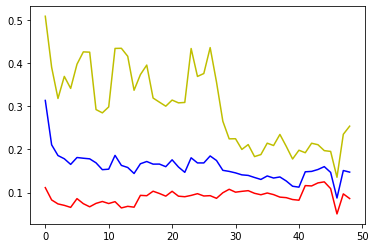

wybrane warstwy:  [44, 43, 41]


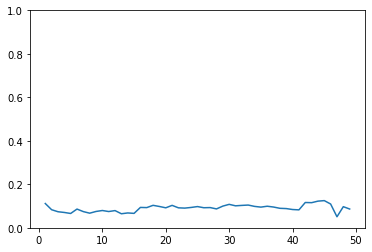

[41, 43, 44]
[[126, 232, 120, 360, 187, 174, 503, 101, 117, 490, 430, 307, 271, 311, 400, 116, 41, 389, 406, 412, 195, 21, 209, 200, 483, 96, 184, 236, 170, 400, 99, 439, 16, 217, 321, 52, 303, 359, 204, 390, 132, 253, 218, 242, 447, 72, 20, 134, 293, 371, 205, 471, 62, 444, 146, 354, 450, 109, 425, 430, 122, 448, 66, 295, 185, 151, 194, 449, 3, 469, 136, 33, 311, 87, 80, 49, 345, 153, 412, 307, 391, 299, 82, 157, 280, 308, 473, 167, 233, 154, 349, 388, 470, 124, 86, 65, 321, 25, 78, 359, 70, 18, 347, 379, 458, 140, 388, 492, 462, 398, 441, 491, 316, 167, 122, 365, 339, 145, 202, 236, 482, 232, 217, 417, 430, 299, 87, 239, 418, 56, 212, 301, 73, 117, 42, 376, 278, 140, 108, 447, 263, 493, 236, 22, 478, 320, 394, 93, 110, 175, 343, 182, 443, 4, 392, 23, 319, 201, 504, 183, 404, 40, 173, 256, 206, 424, 261, 499, 503, 10, 168, 167, 135, 11, 113, 212, 396, 235, 170, 35, 386, 400, 307, 399, 453, 313, 452, 152, 290, 492, 68, 240, 265, 503, 185, 381, 44, 354, 109, 11, 122, 188, 167, 286, 430,

ATL(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Module(
      (0): Module(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (downsample): Module(
          (0): Conv2d(64, 2

In [5]:

class ATL(nn.Module):
    def __init__(self, train, Nclasses, Nlayer=3, Pmax=0.4):
        # call constructor from superclass
        super().__init__()
        self.resnet = models.resnet50(pretrained=True)
        layers, R_scores_for_layers = self.get_layers(train, Nlayer)
        k = sns.lineplot(x=[i+1 for i in range(len(R_scores_for_layers))], y=R_scores_for_layers)
        k.set(ylim=(0, 1))
        plt.show()
        fm_indicies, resnet_out_size = self.get_featuremaps_idicies(train,layers, R_scores_for_layers) 
        self.resnet = self._transform( Nlayer, layers, fm_indicies)
        for param in self.resnet.parameters():
            param.requires_grad = False
        self.relu = nn.ReLU()
        self.fcl = nn.Linear(resnet_out_size, Nclasses)
        self.softmax = torch.nn.Softmax(-1)
            
    def get_layers(self, train, number_of_layers):
        images, labels = train
        conv_layers, model_weights = self.get_resnet_conv_layers()
        feature_map_outputs_for_images = [self.get_feature_map_outputs(image) for image in images]
        labels_set = set(np.asarray(labels))
        
        R_scores_for_layers = []
        r_mean=[]
        r_max=[]
        for conv_ind in range(len(conv_layers)):
            
            centroids_for_class =[]
            LAV_vec = []             
                                
            for image_ind, image in enumerate(images):
                LAV_vec_image = []
                out_fm = feature_map_outputs_for_images[image_ind]
                for fm_ind in range(len(model_weights[conv_ind])):
                    LAV_vec_image.append(self.LAV(out_fm[conv_ind][fm_ind])) ##lav_vec jest vectorem przyjmującym lav dla każdego obrazka
                LAV_vec.append(LAV_vec_image)
            
              
                #iterujemy po klasach w danych
            for class_id, _class in enumerate(labels_set):
                    LAV_vec_curent_class = []
                    for i,fm in enumerate(LAV_vec):
                        if labels[i]==_class:
                            LAV_vec_curent_class.append(fm)
                    
                    n = len(LAV_vec_curent_class)
                    suma = np.asarray([0.0]*len(LAV_vec_curent_class[0]))
                    for k in range(n):
                        norm_l2 = norm(LAV_vec_curent_class[k])
                        nmn = np.asarray(LAV_vec_curent_class[k])/norm_l2
                        suma += nmn
                    centroid = 1/n * suma
                    centroids_for_class.append(centroid)
            
            #R-score
            r_val = []
            for a in range(len(centroids_for_class)-1):
                for b in range(a+1, len(centroids_for_class)):
                    rrrr = np.linalg.norm(centroids_for_class[a]-centroids_for_class[b])
                    r_val.append(rrrr)
            R = min(r_val)
            R2 = np.mean(r_val)
            R3 = max(r_val)
            R_scores_for_layers.append(R)
            r_mean.append(R2)
            r_max.append(R3)
        # choosing the best n layers
        lst = pd.Series(R_scores_for_layers)
        i = lst.nlargest(number_of_layers)
        
        
        
        x = [i for i in range(len(R_scores_for_layers))]
        plt.plot(x,R_scores_for_layers, 'r')
        plt.plot(x,r_mean, 'b')
        plt.plot(x,r_max, 'y')
        plt.show()
        print("wybrane warstwy: ",i.index.values.tolist())
        return sorted(i.index.values.tolist()), R_scores_for_layers 
        
    def get_featuremaps_idicies(self, train, layers,R,Pmax = 0.4):
        Rmax = max(R)
        dim0=[112]
        dim1=[56]*9
        dim2=[28]*12
        dim3=[14]*18
        dim4=[7]*9
        fm_dim = np.concatenate((dim0,dim1,dim2,dim3,dim4))        
        images, labels = train
        #print(labels)
        labels_set = set(np.asarray(labels))                
        conv_layers,model_weights = self.get_resnet_conv_layers()    
        choose_fm = []
        choose_fm_output_len=0        
        feature_map_outputs_for_images = [self.get_feature_map_outputs(image) for image in images]
                
        # iteruje po warstwach konwolucyjnuch 
        print(layers)
        for conv_ind in layers:
            choose_fm_curent_conv_layer = []            
            p_score_for_classs_and_maps  = [{} for i in range(len(labels_set))]
            
            # iteruje po mapach             
            for fm_ind in range(len(model_weights[conv_ind])):                
                LAV_vec = []
                    
                for image_ind,image in enumerate(images):
                    out_fm = feature_map_outputs_for_images[image_ind]
                    LAV_vec.append(self.LAV(out_fm[conv_ind][fm_ind]))
                 
                #iterujemy po klasach w danych
                for class_id, _class in enumerate(labels_set):
                    LAV_vec_curent_class = []
                    LAV_vec_other_class = []
                    for i,fm in enumerate(LAV_vec):
                        if labels[i]==_class:
                            LAV_vec_curent_class.append(fm)
                        else:     
                            LAV_vec_other_class.append(fm)
                    
                    # zwraca nan przy LAV_vec_current_class długości 1 !!
                    # czyli wtedy gdy z jakiejś klasy była tylko jedna obserwacja
                    # przy treningu nie będzie takiej sytucji
                    t_stat, p = ttest_ind(LAV_vec_curent_class, LAV_vec_other_class)
                    
                    p_treshold = Pmax * R[conv_ind]/Rmax
                    
                    if(math.isnan(p)): 
                        print("error: klasa o jednym elemencie")
                        p=1
                    
                    if (p < p_treshold):
                        _dict = p_score_for_classs_and_maps[class_id]
                        _dict[p] = fm_ind
            
            
            # N_feature - minimum z liczby map wybranuch dla danej klasy
            number_of_map_for_classes = [len(d) for d in  p_score_for_classs_and_maps]    
            N_feature = min(number_of_map_for_classes)
            
            for class_id, p_scores_and_map_indexes in enumerate(p_score_for_classs_and_maps):                 
                #wybranie N_feature, "najlepszych" map dla każdej klasy"
                p_scores = list(p_scores_and_map_indexes.keys())                
                sort_p_scores =  np.sort(p_scores)
                low_p_scores = sort_p_scores[:N_feature]
                
                for p_score in low_p_scores:
                    fm_ind = p_scores_and_map_indexes.get(p_score)
                    choose_fm_curent_conv_layer.append(fm_ind)
                    choose_fm_output_len += fm_dim[conv_ind]**2
                                        
            choose_fm.append(choose_fm_curent_conv_layer)
        
        print (choose_fm)
        print (choose_fm_output_len)
        
        # Musi zwracać obiekt który ma N iterowalnych rzeczy, z których każda ma ileś indeksów feature map. 
        # W sumie ilość indeksów musi być równa ilości klas * Nfeature z 2.3 w artykule
        #return [[1],[1]], 1568
        print("wybrane mapy: ", choose_fm)
        return choose_fm, choose_fm_output_len 
    
    
    def LAV(self,featureMap):
        return featureMap.max().detach().numpy().item(0)
    
    def _transform(self, n, layers, idx):
        gm = torch.fx.symbolic_trace(self.resnet)
        graph=gm.graph
        blocks_in_layers = [1,3,4,6,3]
        idx_to_layer_name = ['conv1'] +[f"layer{i}_{j}_conv{k}" for i in range(1,5) for j in range(blocks_in_layers[i]) for k in range(1,4)]
        layer_names = [idx_to_layer_name[idx] for idx in layers]
        final_nodes=[]
        last_node=None

        for node in graph.nodes:
            if node.name in layer_names:
                final_nodes.append(node)
            if not last_node and len(final_nodes)==n:
                last_node = node
            if node.name == 'output':
                out_node = node

        i=0
        nodes_to_output=[]
        for i in range(n):
            with graph.inserting_after(last_node):
            # Insert a new `call_function` node calling `torch.relu`
                new_node = graph.call_function(torch.tensor,
                                               args=(idx[i],),
                                              kwargs={"dtype":torch.int32})
                last_node = new_node

            with graph.inserting_after(last_node):
                new_node = graph.call_function(torch.index_select,
                                              args=(final_nodes[i], 1, last_node))
                last_node = new_node

            with graph.inserting_after(last_node):
                new_node = graph.call_function(torch.flatten,
                                              args=(last_node,1))
                nodes_to_output.append(new_node)
                last_node = new_node
        with graph.inserting_after(last_node):
                new_node = graph.call_function(torch.cat,
                                              args=(nodes_to_output,1))
        out_node.args=(new_node,)
        graph.eliminate_dead_code()
        graph.lint() 
        gm.recompile()
        print("chuj\n\n\n\n"+ gm.code+" \n\n\n\chuj")
        return gm
        
    
    def forward(self, x):
        x = self.resnet(x)
        x = self.relu(x)
        x = self.fcl(x)
        x = self.softmax(x)
        return x
    
    
    def get_resnet_conv_layers(self):
        model = self.resnet
        # we will save the conv layer weights in this list
        model_weights =[]

        #we will save the 49 conv layers in this list
        conv_layers = []

        # get all the model children as list
        model_children = list(model.children())

        #counter to keep count of the conv layers
        counter = 0
        #append all the conv layers and their respective wights to the list

        for i in range(len(model_children)):

            if type(model_children[i]) == nn.Conv2d:
                counter+=1
                model_weights.append(model_children[i].weight)
                conv_layers.append(model_children[i])

            elif type(model_children[i]) == nn.Sequential:
                for j in range(len(model_children[i])):
                    for child in model_children[i][j].children():
                        if type(child) == nn.Conv2d:
                            counter+=1
                            model_weights.append(child.weight)
                            conv_layers.append(child)

        #print(f"Total convolution layers: {counter}")
        #print("conv_layers")
        return (conv_layers,model_weights)
    
    def get_feature_map_outputs(self,image):
        conv_layers, _ = self.get_resnet_conv_layers()
        outputs = []
        names = []

        for layer in conv_layers[0:]:
            image = layer(image)
            outputs.append(image)
            names.append(str(layer))
            
        #print(len(outputs))

        # print feature_maps
        #for feature_map in outputs:
            #print(feature_map.shape)
            
        return outputs;   



# CIFAR100 

# transform = transforms.Compose([                        #[1]
#              transforms.Resize(256),                    #[2]
#              transforms.CenterCrop(224),                #[3]
#              transforms.ToTensor(),                     #[4]
#              transforms.Normalize(                      #[5]
#              mean=[0.485, 0.456, 0.406],                #[6]
#              std=[0.229, 0.224, 0.225]                  #[7]
#              )])


# trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
#                                         download=True, transform=transform)

# trainloader = torch.utils.data.DataLoader(trainset, batch_size=10,
#                                           shuffle=True, num_workers=2)

# testset = torchvision.datasets.CIFAR100(root='./data', train=False,
#                                        download=True, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=4,
#                                          shuffle=False, num_workers=2)

# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



# torch.manual_seed(0)
# # get some random training images
# dataiter = iter(trainloader)
# images, labels = dataiter.next()
# trainset = images, labels
# #print(trainset)

# print(images)
# print(labels)



m = ATL(trainset_few_shot, 15, 3)
#m.eval()

m

In [6]:
len([23, 35, 34, 56, 47, 41, 13, 51, 32, 12, 37, 4, 39, 1, 47, 60, 22, 38, 49, 30, 50, 10, 19, 33, 22, 40, 20, 35, 2, 0, 14, 27, 43, 11, 17, 63, 36, 54, 55, 32, 46, 15, 48, 24, 3, 22, 51, 42, 28, 8, 60, 37, 4, 17, 19, 14, 10, 43, 28, 40, 32, 57, 1, 4, 15, 38, 22, 37, 28, 8, 60, 5, 11, 42, 40, 59, 38, 27, 41, 10, 44, 29, 62, 52, 56, 16, 58, 34, 57, 23, 9, 35, 48, 1, 36, 13, 34, 24, 27, 9, 24, 39, 51, 36, 38, 37, 21, 18, 9, 33, 3, 39, 45, 22, 18, 20, 54, 11, 40, 42, 45, 2, 57, 59, 38, 19, 23, 56, 45, 24, 29, 21, 35, 31, 18, 168, 219, 248, 171, 89, 246, 52, 50, 154, 6, 54, 17, 251, 9, 235, 192, 46, 228, 230, 44, 10, 200, 162, 166, 76, 87, 159, 195, 106, 58, 90, 18, 141, 236, 208, 13, 150, 168, 80, 253, 99, 196, 108, 116, 36, 133, 90, 145, 175, 227, 202, 16, 20, 245, 2, 53, 25, 97, 53, 89, 177, 186, 207, 79, 85, 36, 249, 185, 33, 136, 169, 186, 11, 107, 218, 182, 213, 167, 170, 89, 165, 138, 154, 120, 141, 103, 166, 61, 105, 15, 209, 225, 1, 57, 252, 128, 129, 6, 233, 254, 11, 15, 216, 23, 122, 307, 163, 195, 199, 84, 123, 82, 433, 340, 431, 57, 288, 56, 487, 17, 142, 510, 429, 281, 121, 181, 76, 47, 197, 234, 161, 348, 187, 16, 301, 404, 178, 499, 73, 189, 350, 384, 300, 244, 312, 29, 504, 38, 235, 53, 442, 291, 179, 183, 386, 192, 255, 395, 482, 269, 23, 392, 132, 376, 400, 214, 257, 473, 220, 25, 408, 405, 286, 251, 21, 273, 207, 213, 422, 45, 330, 82, 70, 382, 357, 98, 368, 253, 267, 218, 480, 509, 91, 181, 394, 351, 462, 286, 371, 421, 16, 382, 74, 180, 414, 229, 404, 2, 78, 452, 396, 223, 61, 434, 429, 245, 422, 179, 493, 116, 36, 469, 391, 387, 280, 281, 122, 127, 42, 332, 92, 114, 287, 255, 296, 339, 487, 386, 358, 192, 195, 103, 313, 265, 447, 250, 113, 165, 428, 233, 390, 422, 421, 481, 359, 78, 452, 204, 280, 32, 49, 320, 456, 178, 461, 299, 463, 180, 422, 327, 501, 508, 271, 374, 240, 122, 506, 98, 504, 21, 301, 202, 471, 49, 321, 94, 360, 143, 150, 272, 185, 191, 104, 144, 385, 310, 11, 30, 373, 389, 68, 192, 232, 376, 29, 474, 195, 361, 115, 384, 406, 196, 380, 363, 426, 384, 510, 215, 2, 179, 383, 448, 459, 90, 417, 33, 486, 366, 44, 452, 496, 127, 150, 291, 273, 167, 357, 179, 281, 142, 406, 404, 41, 131, 241, 349, 59, 170, 437, 187, 332, 97, 468, 482, 259, 256, 93, 421, 351, 116, 267, 218, 419, 371, 181, 86, 247, 325, 214, 414, 91, 359, 148, 143, 394, 180, 289, 189, 84, 188, 289, 379, 433, 129, 37, 115, 258, 56, 105, 317, 253, 120, 354, 96, 219, 155, 507, 426, 278, 230, 286, 262, 359, 445, 66, 266, 92, 254, 39, 202, 291, 394, 225, 180, 153, 204, 441, 121, 453, 78])

555

In [7]:

criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(m.parameters(), lr=0.001, momentum=0.9)
optimizer = torch.optim.Adam(m.parameters(),lr=0.01)
scheduler = lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=0.8)

tensor([[0.0712, 0.0671, 0.0661, 0.0659, 0.0684, 0.0733, 0.0686, 0.0655, 0.0601,
         0.0636, 0.0632, 0.0607, 0.0666, 0.0713, 0.0684],
        [0.0700, 0.0685, 0.0729, 0.0670, 0.0675, 0.0671, 0.0701, 0.0690, 0.0629,
         0.0610, 0.0638, 0.0666, 0.0698, 0.0585, 0.0652],
        [0.0736, 0.0722, 0.0660, 0.0722, 0.0696, 0.0712, 0.0606, 0.0672, 0.0609,
         0.0607, 0.0635, 0.0643, 0.0629, 0.0620, 0.0729],
        [0.0665, 0.0707, 0.0644, 0.0655, 0.0697, 0.0712, 0.0634, 0.0677, 0.0649,
         0.0627, 0.0644, 0.0671, 0.0646, 0.0683, 0.0689],
        [0.0676, 0.0683, 0.0644, 0.0662, 0.0693, 0.0641, 0.0665, 0.0670, 0.0619,
         0.0711, 0.0662, 0.0593, 0.0635, 0.0728, 0.0719],
        [0.0682, 0.0718, 0.0674, 0.0684, 0.0628, 0.0653, 0.0682, 0.0713, 0.0654,
         0.0632, 0.0674, 0.0643, 0.0643, 0.0649, 0.0672],
        [0.0640, 0.0687, 0.0744, 0.0679, 0.0645, 0.0647, 0.0733, 0.0676, 0.0593,
         0.0692, 0.0640, 0.0662, 0.0598, 0.0666, 0.0700],
        [0.0661, 0.0681, 0.

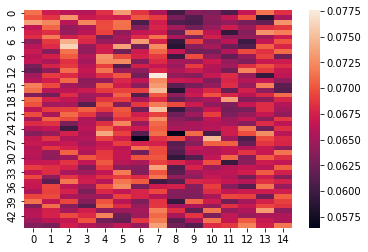

[1] loss: 0.108
tensor([[1.0000e+00, 8.5466e-11, 3.8064e-10, 6.1705e-10, 7.2407e-12, 2.4654e-10,
         9.3937e-10, 1.5362e-09, 3.2741e-10, 1.2746e-10, 3.6704e-09, 4.8949e-11,
         3.4053e-10, 2.9136e-10, 3.6873e-12],
        [1.0000e+00, 2.4017e-12, 4.7497e-13, 1.5333e-12, 2.7227e-12, 1.7611e-12,
         7.1017e-13, 1.0126e-13, 8.8641e-13, 3.3473e-14, 1.4828e-12, 3.4551e-14,
         4.7405e-14, 9.8227e-13, 2.3763e-13],
        [1.0000e+00, 4.8979e-13, 1.5364e-12, 2.3126e-11, 2.9023e-13, 2.0047e-11,
         6.0940e-12, 1.0168e-11, 2.2200e-12, 9.5251e-12, 5.8270e-11, 7.1173e-13,
         3.6568e-12, 5.7314e-12, 9.7145e-14],
        [2.0543e-09, 1.0000e+00, 2.9399e-10, 5.7670e-10, 2.8324e-10, 1.2417e-10,
         2.3925e-10, 1.4686e-10, 2.4129e-10, 2.1788e-11, 1.5513e-10, 2.4317e-11,
         1.0223e-10, 6.4815e-10, 4.1714e-10],
        [4.3422e-11, 1.0000e+00, 3.9280e-10, 1.5233e-11, 2.1751e-11, 5.9701e-10,
         7.4449e-11, 3.4342e-11, 6.1132e-11, 1.1250e-11, 4.1259e-10, 1.

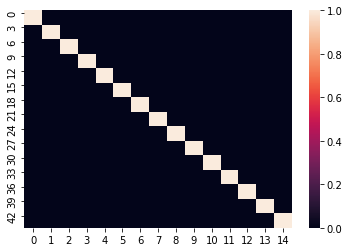

[2] loss: 0.073
tensor([[1.0000e+00, 1.5995e-17, 1.9574e-16, 4.3962e-16, 2.5613e-19, 8.8487e-17,
         8.6328e-16, 2.0293e-15, 1.6218e-16, 3.2544e-17, 8.8797e-15, 6.7589e-18,
         1.6170e-16, 1.1910e-16, 8.2997e-20],
        [1.0000e+00, 4.0024e-20, 2.5636e-21, 1.9211e-20, 4.9895e-20, 2.4186e-20,
         5.1523e-21, 2.0171e-22, 8.0196e-21, 3.4494e-23, 1.8748e-20, 3.4287e-23,
         5.6243e-23, 9.9932e-21, 8.6937e-22],
        [1.0000e+00, 2.8082e-21, 2.0119e-20, 1.7553e-18, 1.2032e-21, 1.3952e-18,
         2.1282e-19, 4.6838e-19, 3.9260e-20, 4.5051e-19, 8.9463e-18, 5.6776e-21,
         8.8514e-20, 1.8909e-19, 1.8730e-22],
        [3.2269e-15, 1.0000e+00, 1.2856e-16, 3.9161e-16, 1.1463e-16, 2.8489e-17,
         9.1992e-17, 3.9047e-17, 9.1905e-17, 1.7047e-18, 4.4182e-17, 1.9501e-18,
         2.1965e-17, 4.6262e-16, 2.2046e-16],
        [4.9660e-18, 1.0000e+00, 2.0365e-16, 8.7897e-19, 1.5464e-18, 4.1106e-16,
         1.2397e-17, 3.3919e-18, 9.3531e-18, 5.0630e-19, 2.1689e-16, 1.

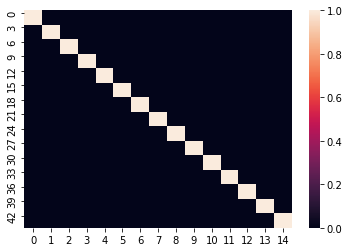

[3] loss: 0.073
tensor([[1.0000e+00, 1.0080e-22, 2.6947e-21, 7.7854e-21, 4.4526e-25, 9.2250e-22,
         1.8619e-20, 5.7924e-20, 2.1687e-21, 2.6081e-22, 4.0467e-19, 3.3672e-23,
         2.0929e-21, 1.3729e-21, 1.0176e-25],
        [1.0000e+00, 3.8895e-26, 1.0424e-27, 1.4976e-26, 5.2180e-26, 2.0245e-26,
         2.6332e-27, 3.7952e-29, 4.8604e-27, 3.9000e-30, 1.4720e-26, 3.7636e-30,
         7.0903e-30, 6.6326e-27, 2.6171e-28],
        [1.0000e+00, 1.1960e-27, 1.6225e-26, 5.5064e-24, 3.9883e-28, 4.0925e-24,
         3.6642e-25, 9.9864e-25, 3.9937e-26, 9.8058e-25, 4.8386e-23, 3.1217e-27,
         1.1479e-25, 3.1151e-25, 3.4356e-29],
        [1.0533e-19, 1.0000e+00, 1.5615e-21, 6.6845e-21, 1.3109e-21, 2.1017e-22,
         1.0114e-21, 3.2286e-22, 1.0032e-21, 5.4758e-24, 3.8529e-22, 6.3841e-24,
         1.5401e-22, 8.2058e-21, 3.0999e-21],
        [2.1387e-23, 1.0000e+00, 2.8209e-21, 2.2309e-24, 4.6113e-24, 7.0917e-21,
         7.1383e-23, 1.3042e-23, 5.0439e-23, 1.0606e-24, 3.0374e-21, 2.

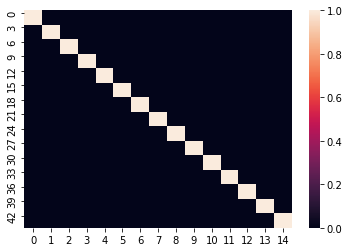

[4] loss: 0.073
tensor([[1.0000e+00, 5.5404e-27, 2.8093e-25, 9.9756e-25, 8.5216e-30, 7.6584e-26,
         2.8041e-24, 1.0972e-23, 2.2074e-25, 1.7458e-26, 1.1247e-22, 1.5267e-27,
         2.0744e-25, 1.2376e-25, 1.4633e-30],
        [1.0000e+00, 4.6237e-31, 6.0707e-33, 1.4864e-31, 6.5871e-31, 2.1303e-31,
         1.8495e-32, 1.1756e-34, 3.9248e-32, 7.9610e-36, 1.4695e-31, 7.4961e-36,
         1.5823e-35, 5.7702e-32, 1.1915e-33],
        [1.0000e+00, 7.2325e-33, 1.6553e-31, 1.7093e-28, 1.9642e-33, 1.2023e-28,
         6.9588e-30, 2.2592e-29, 4.9280e-31, 2.2565e-29, 2.3469e-27, 2.3272e-32,
         1.7282e-30, 5.7059e-30, 1.0421e-34],
        [2.2274e-23, 1.0000e+00, 1.4693e-25, 8.3120e-25, 1.1740e-25, 1.3146e-26,
         8.7714e-26, 2.2172e-26, 8.6492e-26, 1.7336e-28, 2.7640e-26, 2.0525e-28,
         9.2402e-27, 1.0529e-24, 3.2886e-25],
        [8.6072e-28, 1.0000e+00, 2.9557e-25, 5.8222e-29, 1.3733e-28, 8.8956e-25,
         3.6448e-27, 4.7832e-28, 2.4403e-27, 2.3652e-29, 3.2115e-25, 8.

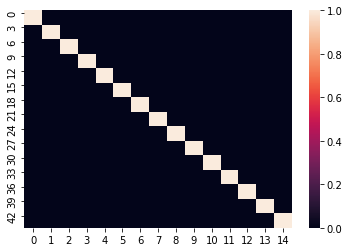

[5] loss: 0.073
tensor([[1.0000e+00, 1.3898e-30, 1.2107e-28, 5.1172e-28, 8.7633e-34, 2.7224e-29,
         1.6492e-27, 7.8327e-27, 9.3215e-29, 5.1737e-30, 1.1103e-25, 3.2549e-31,
         8.5657e-29, 4.7164e-29, 1.1820e-34],
        [1.0000e+00, 3.1798e-35, 2.2843e-37, 8.7770e-36, 4.7657e-35, 1.3216e-35,
         8.1536e-37, 2.5940e-39, 1.9465e-36, 1.2350e-40, 8.7193e-36, 1.1387e-40,
         2.6465e-40, 3.0481e-36, 3.6409e-38],
        [1.0000e+00, 2.8091e-37, 1.0002e-35, 2.6456e-32, 6.4135e-38, 1.7763e-32,
         7.1106e-34, 2.6762e-33, 3.4972e-35, 2.7121e-33, 5.2974e-31, 1.0788e-36,
         1.4512e-34, 5.6544e-34, 2.2590e-39],
        [1.7453e-26, 1.0000e+00, 5.8065e-29, 4.1578e-28, 4.4488e-29, 3.6787e-30,
         3.2353e-29, 6.7147e-30, 3.1744e-29, 2.7286e-32, 8.6855e-30, 3.2726e-32,
         2.4962e-30, 5.4083e-28, 1.4383e-28],
        [1.6592e-31, 1.0000e+00, 1.2791e-28, 7.7830e-33, 2.0523e-32, 4.4827e-28,
         8.5919e-31, 8.5243e-32, 5.4963e-31, 2.7685e-33, 1.4007e-28, 1.

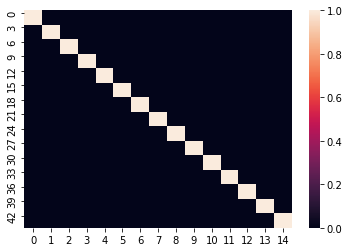

[6] loss: 0.073
tensor([[1.0000e+00, 1.0959e-33, 1.5218e-31, 7.4745e-31, 3.2040e-37, 2.8990e-32,
         2.7106e-30, 1.5211e-29, 1.1513e-31, 4.7104e-33, 2.8512e-28, 2.2308e-34,
         1.0378e-31, 5.3329e-32, 3.5101e-38],
        [1.0000e+00, 8.2193e-39, 3.5115e-41, 1.9895e-39, 1.2869e-38, 3.1266e-39,
         1.4368e-40, 2.5223e-43, 3.7964e-40, 8.4078e-45, 1.9848e-39, 8.4078e-45,
         1.9618e-44, 6.2768e-40, 4.6775e-42],
        [1.0000e+00, 4.4374e-41, 2.3127e-39, 1.3759e-35, 8.7231e-42, 8.8745e-36,
         2.5857e-37, 1.1053e-36, 9.2873e-39, 1.1343e-36, 3.8139e-34, 1.9849e-40,
         4.4557e-38, 2.0025e-37, 2.1580e-43],
        [3.6733e-29, 1.0000e+00, 6.7742e-32, 5.9436e-31, 5.0055e-32, 3.1876e-33,
         3.5567e-32, 6.2285e-33, 3.4748e-32, 1.4399e-35, 8.3171e-33, 1.7463e-35,
         2.0983e-33, 7.9096e-31, 1.8314e-31],
        [1.0427e-34, 1.0000e+00, 1.6137e-31, 3.5673e-36, 1.0356e-35, 6.4486e-31,
         6.4219e-34, 5.0060e-35, 3.9496e-34, 1.1318e-36, 1.7793e-31, 5.

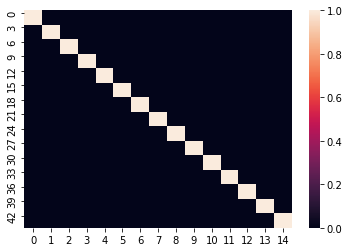

[7] loss: 0.073
tensor([[1.0000e+00, 2.1368e-36, 4.4590e-34, 2.4967e-33, 3.1926e-40, 7.3483e-35,
         1.0037e-32, 6.5155e-32, 3.3219e-34, 1.0413e-35, 1.5590e-30, 3.8481e-37,
         2.9444e-34, 1.4244e-34, 2.9168e-41],
        [1.0000e+00, 6.0508e-42, 1.6816e-44, 1.3060e-42, 9.8427e-42, 2.1314e-42,
         7.5670e-44, 0.0000e+00, 2.1860e-43, 0.0000e+00, 1.3074e-42, 0.0000e+00,
         0.0000e+00, 3.7835e-43, 1.4013e-45],
        [1.0000e+00, 2.1019e-44, 1.5442e-42, 1.8653e-38, 4.2039e-45, 1.1616e-38,
         2.5648e-40, 1.2251e-39, 7.0009e-42, 1.2713e-39, 6.8691e-37, 1.0790e-43,
         3.8125e-41, 1.9408e-40, 0.0000e+00],
        [1.6882e-31, 1.0000e+00, 1.8597e-34, 1.9485e-33, 1.3312e-34, 6.7490e-36,
         9.2696e-35, 1.3996e-35, 9.0232e-35, 1.9772e-38, 1.9217e-35, 2.4211e-38,
         4.3261e-36, 2.6450e-33, 5.4266e-34],
        [1.6677e-37, 1.0000e+00, 4.7431e-34, 4.3314e-39, 1.3675e-38, 2.1258e-33,
         1.1950e-36, 7.5463e-38, 7.1009e-37, 1.2436e-39, 5.2613e-34, 7.

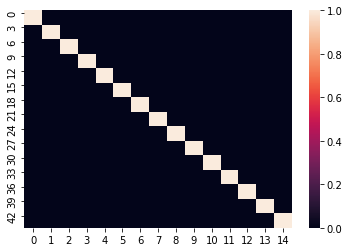

[8] loss: 0.073
tensor([[1.0000e+00, 8.7244e-39, 2.6071e-36, 1.6385e-35, 7.2167e-43, 3.7812e-37,
         7.2146e-35, 5.3241e-34, 1.9160e-36, 4.7496e-38, 1.5799e-32, 1.4104e-39,
         1.6734e-36, 7.6758e-37, 5.6052e-44],
        [1.0000e+00, 9.8091e-45, 0.0000e+00, 1.4013e-45, 1.8217e-44, 2.8026e-45,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4013e-45, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 2.8026e-45, 5.5285e-41, 0.0000e+00, 3.3379e-41,
         5.7733e-43, 3.0408e-42, 1.2612e-44, 3.1866e-42, 2.6153e-39, 0.0000e+00,
         7.5670e-44, 4.2740e-43, 0.0000e+00],
        [1.4679e-33, 1.0000e+00, 1.0267e-36, 1.2579e-35, 7.1456e-37, 2.9634e-38,
         4.8884e-37, 6.4766e-38, 4.7428e-37, 5.9271e-41, 9.1132e-38, 7.3195e-41,
         1.8556e-38, 1.7377e-35, 3.2044e-36],
        [5.7179e-40, 1.0000e+00, 2.7808e-36, 1.1648e-41, 3.9598e-41, 1.3790e-35,
         4.6827e-39, 2.4558e-40, 2.6993e-39, 3.0632e-42, 3.1012e-36, 1.

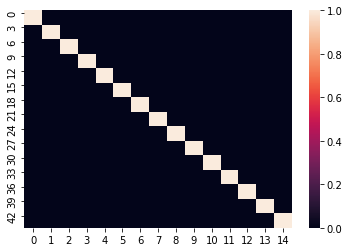

[9] loss: 0.073
tensor([[1.0000e+00, 6.6063e-41, 2.7153e-38, 1.8908e-37, 2.8026e-45, 3.5158e-39,
         9.0258e-37, 7.4637e-36, 1.9714e-38, 3.9683e-40, 2.6812e-34, 9.7040e-42,
         1.6995e-38, 7.4358e-39, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 3.1529e-43, 0.0000e+00, 1.8497e-43,
         2.8026e-45, 1.5414e-44, 0.0000e+00, 1.5414e-44, 1.8611e-41, 0.0000e+00,
         0.0000e+00, 1.4013e-45, 0.0000e+00],
        [2.1744e-35, 1.0000e+00, 1.0161e-38, 1.4305e-37, 6.8978e-39, 2.3934e-40,
         4.6452e-39, 5.4805e-40, 4.4940e-39, 3.4052e-43, 7.8815e-40, 4.2459e-43,
         1.4678e-40, 2.0070e-37, 3.3668e-38],
        [3.7078e-42, 1.0000e+00, 2.9031e-38, 6.0256e-44, 2.2141e-43, 1.5750e-37,
         3.4187e-41, 1.5204e-42, 1.9182e-41, 1.5414e-44, 3.2533e-38, 1.

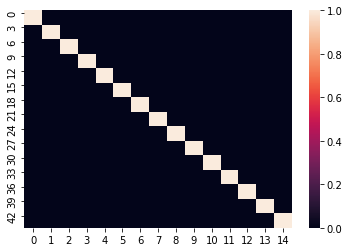

[10] loss: 0.073
tensor([[1.0000e+00, 8.4498e-43, 4.6199e-40, 3.5252e-39, 0.0000e+00, 5.4062e-41,
         1.8087e-38, 1.6555e-37, 3.3182e-40, 5.5463e-42, 7.0533e-36, 1.1351e-43,
         2.8272e-40, 1.1859e-40, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 2.8026e-45, 0.0000e+00, 1.4013e-45,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.2561e-43, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [5.0668e-37, 1.0000e+00, 1.6520e-40, 2.6328e-39, 1.0967e-40, 3.2454e-42,
         7.2830e-41, 7.7478e-42, 7.0279e-41, 2.8026e-45, 1.1362e-41, 4.2039e-45,
         1.9534e-42, 3.7451e-39, 5.7737e-40],
        [4.0638e-44, 1.0000e+00, 4.9499e-40, 0.0000e+00, 2.8026e-45, 2.9098e-39,
         4.2319e-43, 1.6816e-44, 2.3262e-43, 0.0000e+00, 5.5710e-40, 1

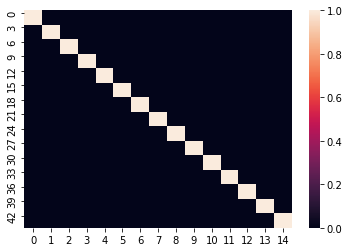

[11] loss: 0.073
tensor([[1.0000e+00, 1.6816e-44, 1.1999e-41, 9.9372e-41, 0.0000e+00, 1.2822e-42,
         5.4395e-40, 5.4529e-39, 8.5339e-42, 1.2051e-43, 2.7070e-37, 2.8026e-45,
         7.1957e-42, 2.9063e-42, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.2039e-45, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.7444e-38, 1.0000e+00, 4.1198e-42, 7.3368e-41, 2.6807e-42, 6.8664e-44,
         1.7572e-42, 1.7096e-43, 1.6928e-42, 0.0000e+00, 2.5504e-43, 0.0000e+00,
         4.0638e-44, 1.0567e-40, 1.5103e-41],
        [1.4013e-45, 1.0000e+00, 1.2879e-41, 0.0000e+00, 0.0000e+00, 8.1364e-41,
         8.4078e-45, 0.0000e+00, 4.2039e-45, 0.0000e+00, 1.4554e-41, 0

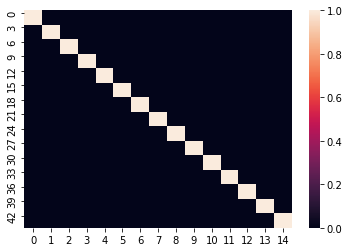

[12] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 4.4982e-43, 4.0161e-42, 0.0000e+00, 4.4842e-44,
         2.3297e-41, 2.5344e-40, 3.1809e-43, 4.2039e-45, 1.4437e-38, 0.0000e+00,
         2.6485e-43, 1.0370e-43, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [8.4358e-40, 1.0000e+00, 1.4854e-43, 2.9343e-42, 9.5288e-44, 2.8026e-45,
         6.1657e-44, 5.6052e-45, 5.8855e-44, 0.0000e+00, 8.4078e-45, 0.0000e+00,
         1.4013e-45, 4.2726e-42, 5.7033e-43],
        [0.0000e+00, 1.0000e+00, 4.8485e-43, 0.0000e+00, 0.0000e+00, 3.2636e-42,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.4931e-43, 0

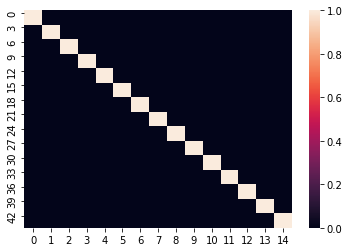

[13] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 2.3822e-44, 2.2281e-43, 0.0000e+00, 2.8026e-45,
         1.3607e-42, 1.5936e-41, 1.6816e-44, 0.0000e+00, 1.0275e-39, 0.0000e+00,
         1.4013e-44, 5.6052e-45, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [5.4979e-41, 1.0000e+00, 7.0065e-45, 1.6115e-43, 4.2039e-45, 0.0000e+00,
         2.8026e-45, 0.0000e+00, 2.8026e-45, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 2.3682e-43, 2.9427e-44],
        [0.0000e+00, 1.0000e+00, 2.5223e-44, 0.0000e+00, 0.0000e+00, 1.7937e-43,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.8026e-44, 0

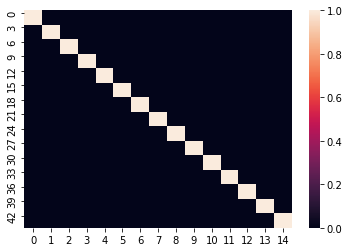

[14] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 1.4013e-45, 1.6816e-44, 0.0000e+00, 0.0000e+00,
         1.0510e-43, 1.3088e-42, 1.4013e-45, 0.0000e+00, 9.4401e-41, 0.0000e+00,
         1.4013e-45, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [4.6649e-42, 1.0000e+00, 0.0000e+00, 1.1210e-44, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.6816e-44, 1.4013e-45],
        [0.0000e+00, 1.0000e+00, 1.4013e-45, 0.0000e+00, 0.0000e+00, 1.2612e-44,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4013e-45, 0

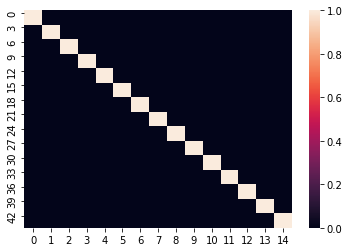

[15] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 1.4013e-45, 0.0000e+00, 0.0000e+00,
         9.8091e-45, 1.3593e-43, 0.0000e+00, 0.0000e+00, 1.0881e-41, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [5.0026e-43, 1.0000e+00, 0.0000e+00, 1.4013e-45, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.4013e-45, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4013e-45,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

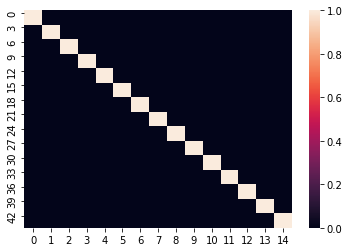

[16] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.4013e-45, 1.8217e-44, 0.0000e+00, 0.0000e+00, 1.5358e-42, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [6.5861e-44, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

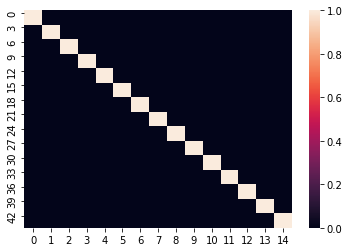

[17] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 2.8026e-45, 0.0000e+00, 0.0000e+00, 2.6064e-43, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.1210e-44, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

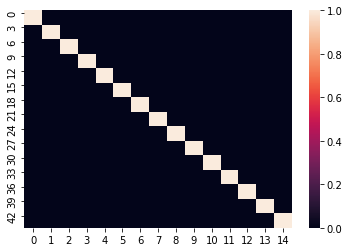

[18] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.1848e-44, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.4013e-45, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

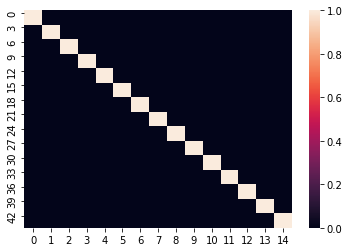

[19] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2612e-44, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

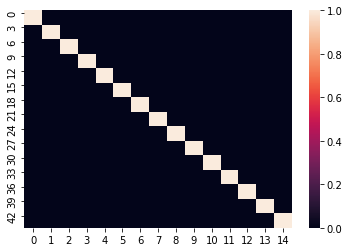

[20] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.8026e-45, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

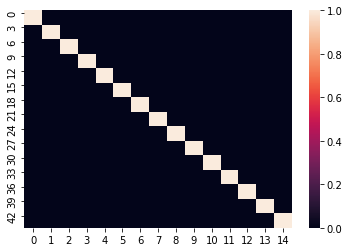

[21] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4013e-45, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

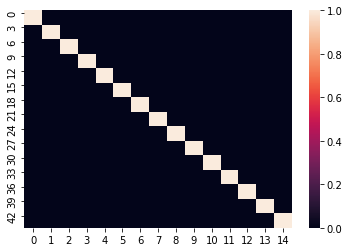

[22] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

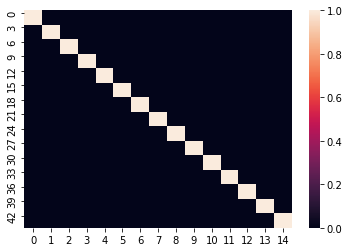

[23] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

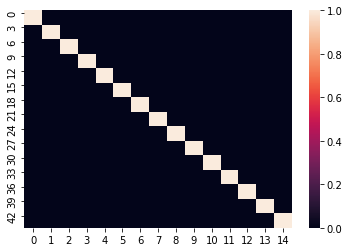

[24] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

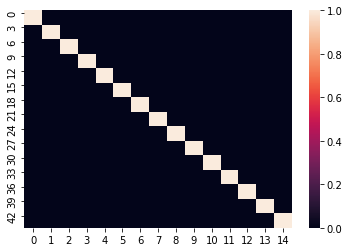

[25] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

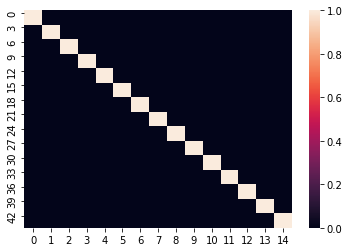

[26] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

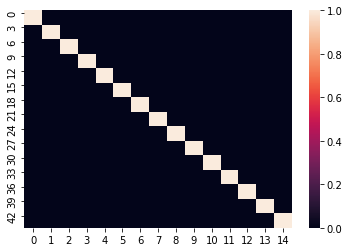

[27] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

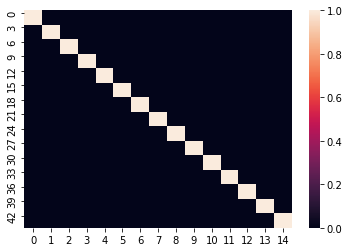

[28] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

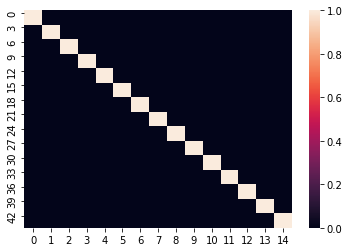

[29] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

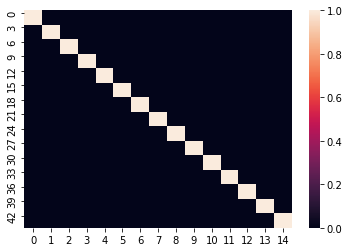

[30] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

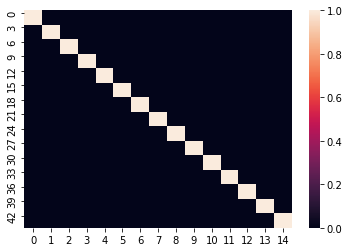

[31] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

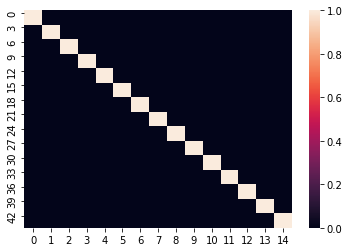

[32] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

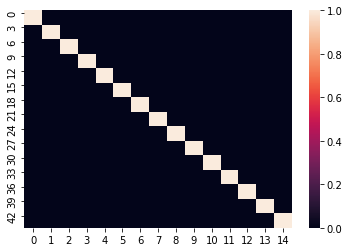

[33] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

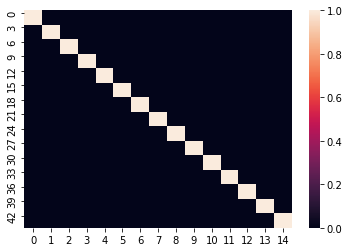

[34] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

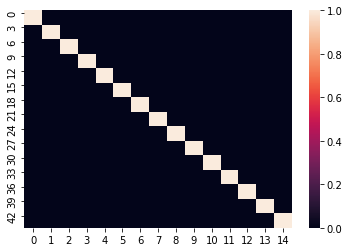

[35] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

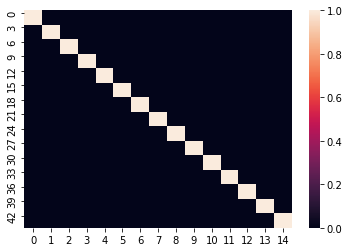

[36] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

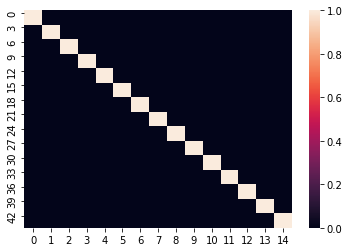

[37] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

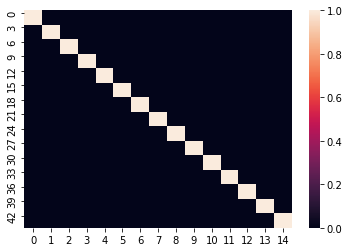

[38] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

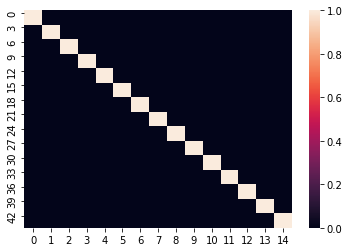

[39] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

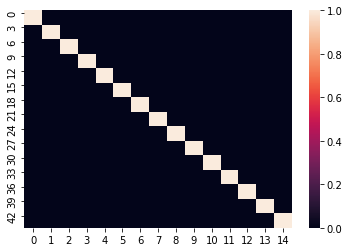

[40] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

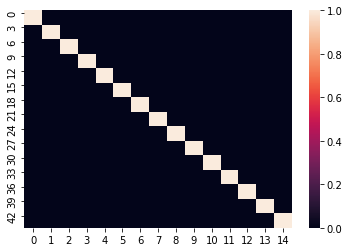

[41] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

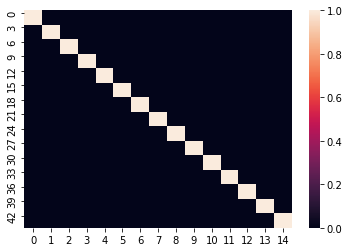

[42] loss: 0.073
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0

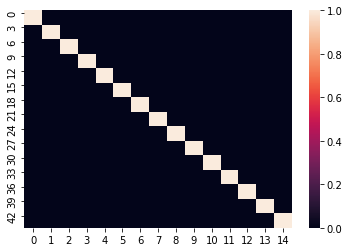

[43] loss: 0.073


KeyboardInterrupt: 

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt
for epoch in range(50):  # loop over the dataset multiple times
    

    
    running_loss = 0.0
    # get the inputs
    inputs, labels = trainset_few_shot #data
    

    # zero the parameter gradients
    optimizer.zero_grad()
        
    outputs = m(inputs)
    print(outputs)
    sns.heatmap(outputs.detach())
    plt.show()
    #print(len(labels))
    #print(len(outputs))
    

        
    loss = criterion(outputs, labels)
    
    running_loss += loss.item()
    print('[%d] loss: %.3f' %
        (epoch + 1, running_loss / 25))
        
    loss.backward()
    optimizer.step()

    # print statistics
    
#     print('[%d] loss: %.3f' %
#         (epoch + 1, running_loss / 25))
        
    if epoch % 20 == 0:
        pass
        #scheduler.step()

print('Finished Training')

In [12]:
import numpy as np
a=[[126, 232, 120, 360, 187, 174, 503, 101, 117, 490, 430, 307, 271, 311, 400, 116, 41, 389, 406, 412, 195, 21, 209, 200, 483, 96, 184, 236, 170, 400, 99, 439, 16, 217, 321, 52, 303, 359, 204, 390, 132, 253, 218, 242, 447, 72, 20, 134, 293, 371, 205, 471, 62, 444, 146, 354, 450, 109, 425, 430, 122, 448, 66, 295, 185, 151, 194, 449, 3, 469, 136, 33, 311, 87, 80, 49, 345, 153, 412, 307, 391, 299, 82, 157, 280, 308, 473, 167, 233, 154, 349, 388, 470, 124, 86, 65, 321, 25, 78, 359, 70, 18, 347, 379, 458, 140, 388, 492, 462, 398, 441, 491, 316, 167, 122, 365, 339, 145, 202, 236, 482, 232, 217, 417, 430, 299, 87, 239, 418, 56, 212, 301, 73, 117, 42, 376, 278, 140, 108, 447, 263, 493, 236, 22, 478, 320, 394, 93, 110, 175, 343, 182, 443, 4, 392, 23, 319, 201, 504, 183, 404, 40, 173, 256, 206, 424, 261, 499, 503, 10, 168, 167, 135, 11, 113, 212, 396, 235, 170, 35, 386, 400, 307, 399, 453, 313, 452, 152, 290, 492, 68, 240, 265, 503, 185, 381, 44, 354, 109, 11, 122, 188, 167, 286, 430, 461, 10, 210, 510, 456, 248, 15, 45, 454, 396, 53, 368, 431, 413, 243, 490, 48, 477, 15, 19, 344, 49, 144, 60, 231, 363, 495, 250, 150, 168, 37, 117, 174, 136, 485, 63, 437, 455, 256, 117, 292, 302, 87, 133, 243, 31, 499, 222, 378, 234, 300, 395, 27, 284, 433, 468, 282, 481, 261, 122, 45, 436, 265, 150, 502, 171, 77, 454, 236, 372, 364, 285, 70, 422, 407, 167, 79, 336, 452, 498, 190, 330, 411, 492, 347, 16, 35, 165, 52, 8, 455, 169, 438, 207, 486, 461, 385, 81, 240, 372, 140, 371, 298, 381, 174, 155, 94, 409, 279, 31, 497, 90, 463, 495, 224, 429, 333, 189, 146, 51, 300, 375, 458, 118, 374, 270, 353, 6, 434, 326, 448, 24, 305, 301, 269, 148, 69, 393, 264, 154, 418, 275, 107, 238, 485, 347, 81, 18, 296, 467, 271, 91, 123, 41, 9], [130, 283, 134, 126, 306, 201, 404, 358, 401, 320, 415, 364, 419, 45, 87, 192, 296, 74, 301, 294, 462, 94, 466, 108, 418, 237, 385, 507, 272, 447, 144, 210, 376, 197, 487, 352, 188, 219, 187, 104, 228, 407, 316, 3, 443, 30, 46, 262, 201, 227, 423, 114, 261, 29, 287, 412, 80, 195, 102, 263, 371, 277, 322, 96, 97, 62, 54, 205, 223, 232, 484, 100, 379, 409, 162, 11, 115, 72, 274, 50, 243, 401, 146, 183, 135, 383, 122, 191, 460, 84, 370, 144, 173, 94, 306, 430, 86, 289, 205, 267, 359, 408, 273, 256, 509, 82, 56, 333, 409, 258, 314, 467, 13, 469, 94, 488, 478, 68, 225, 454, 389, 167, 453, 312, 404, 327, 139, 429, 333, 336, 145, 231, 311, 38, 5, 181, 208, 374, 385, 401, 267, 504, 419, 498, 88, 254, 335, 472, 142, 497, 120, 15, 2, 3, 114, 416, 328, 360, 159, 495, 91, 413, 241, 187, 337, 237, 334, 440, 168, 93, 258, 88, 490, 205, 282, 21, 146, 200, 275, 368, 491, 261, 228, 183, 190, 263, 236, 226, 204, 321, 386, 371, 130, 43, 490, 498, 511, 149, 286, 375, 78, 242, 293, 328, 397, 204, 227, 237, 334, 216, 304, 422, 212, 275, 339, 35, 50, 274, 116, 46, 163, 337, 16, 147, 117, 412, 178, 455, 52, 467, 218, 398, 370, 358, 55, 446, 137, 509, 209, 489, 147, 434, 307, 314, 472, 12, 217, 171, 161, 481, 485, 195, 81, 19, 77, 109, 212, 305, 437, 182, 409, 211, 369, 278, 510, 235, 452, 80, 212, 328, 296, 332, 207, 141, 484, 128, 425, 419, 239, 44, 397, 264, 227, 130, 157, 330, 142, 63, 318, 84, 511, 246, 498, 104, 160, 201, 30, 333, 69, 412, 190, 228, 483, 61, 324, 292, 359, 440, 145, 334, 74, 296, 388, 226, 28, 130, 183, 472, 25, 321, 297, 401, 417, 461, 16, 136, 404, 315, 267, 474, 142, 59, 119, 139, 56, 181, 408, 317, 420, 227, 153, 231, 72, 38, 274, 356, 389, 375, 420, 309, 214, 184, 210, 167, 476, 487, 353, 115, 47, 64, 158, 84, 391, 442, 41, 220, 418, 70, 386, 333, 422, 404, 98, 293, 325, 318, 454, 110, 119, 124, 342, 320, 314, 494, 406, 370, 435, 357, 200, 52, 123, 465, 510, 22, 101, 24, 110, 462, 152, 478, 182, 446, 150, 95, 75, 450, 116, 192, 379, 305, 444, 362, 26, 109, 206, 292, 160, 18, 29, 175, 202, 465, 73, 2, 429, 367, 112, 226, 463, 153, 325, 93, 420, 297, 498, 460, 499, 101, 53, 32, 496, 318, 437, 266, 146, 343, 48, 96, 121, 183, 164, 353, 150, 451, 17, 21, 413, 188, 339, 64, 75, 376, 484, 461, 300, 217, 414, 441, 447, 223, 21, 425, 184, 309, 416, 272, 499, 4, 460, 299, 14, 15, 343, 507, 143, 52, 409, 65, 94, 434, 187, 168, 448, 292, 199, 344, 352, 275, 60, 88, 79, 495, 178, 449, 67, 173, 186, 177, 458, 455, 399, 0, 251, 126, 384, 102, 172, 308, 84, 477, 375, 366, 383, 270, 411, 360, 319, 220, 293, 302, 257, 39, 238, 108, 294, 341, 76, 459, 426, 204, 474, 418, 215, 378, 237, 185, 464, 148, 283, 486, 509, 466, 503, 344, 258, 281, 210, 229, 75, 477, 441, 42, 256, 159, 400, 242, 188, 300, 236, 320], [154, 140, 169, 485, 344, 79, 130, 164, 182, 308, 14, 68, 283, 248, 288, 253, 409, 267, 134, 412, 501, 451, 432, 166, 109, 360, 465, 417, 115, 490, 393, 307, 390, 428, 218, 306, 374, 138, 395, 347, 243, 439, 335, 496, 37, 102, 207, 1, 97, 402, 192, 232, 464, 188, 171, 39, 463, 88, 397, 19, 336, 230, 376, 426, 220, 359, 143, 351, 455, 404, 47, 139, 116, 218, 348, 42, 180, 229, 234, 495, 264, 238, 103, 186, 211, 189, 481, 204, 105, 315, 421, 216, 76, 122, 223, 330, 414, 299, 297, 60, 73, 200, 196, 453, 441, 490, 191, 86, 231, 243, 279, 32, 353, 153, 256, 266, 499, 245, 369, 148, 461, 71, 244, 446, 157, 478, 486, 483, 159, 453, 496, 272, 372, 287, 365, 163, 117, 308, 113, 193, 467, 66, 165, 402, 375, 83, 89, 436, 235, 376, 482, 361, 43, 118, 495, 25, 463, 360, 296, 411, 141, 472, 508, 181, 257, 267, 475, 69, 130, 254, 166, 292, 358, 427, 433, 279, 50, 210, 389, 211, 300, 387, 442, 439, 192, 250, 392, 457, 106, 115, 424, 242, 395, 425, 138, 108, 360, 178, 24, 405, 23, 349, 366, 83, 260, 202, 459, 132, 109, 334, 412, 177, 417, 304, 13, 130, 372, 311, 134, 55, 343, 415, 115, 444, 222, 234, 227, 14, 338, 75, 59, 206, 68, 64, 97, 286, 414, 149, 411, 243, 220, 244, 76, 501, 463, 147, 511, 19, 427, 128, 460, 326, 41, 464, 31, 154, 301, 394, 89, 150, 214, 78, 201, 468, 486, 229, 161, 242, 116, 239, 33, 225, 455, 148, 180, 228, 204, 354, 64, 21, 462, 359, 151, 147, 38, 52, 371, 436, 334, 342, 444, 223, 95, 35, 213, 405, 135, 126, 327, 318, 66, 230, 419, 212, 73, 441, 70, 9, 309, 199, 314, 291, 347, 251, 236, 282, 262, 174, 47, 107, 500, 443, 251, 408, 137, 269, 73, 335, 281, 315, 213, 155, 486, 150, 93, 157, 375, 300, 423, 306, 186, 509, 128, 24, 172, 201, 511, 301, 206, 19, 485, 322, 289, 363, 250, 89, 299, 410, 327, 71, 314, 371, 366, 62, 311, 409, 368, 481, 68, 252, 189, 276, 419, 317, 198, 318, 153, 101, 414, 187, 36, 308, 28, 383, 369, 232, 122, 390, 191, 95, 386, 358, 90, 428, 388, 250, 103, 426, 125, 4, 29, 221, 5, 414, 422, 12, 441, 313, 322, 229, 22, 439, 275, 296, 97, 391, 272, 131, 217, 455, 488, 81, 311, 283, 9, 460, 190, 187, 192, 331, 277, 87, 174, 279, 16, 464, 382, 255, 266, 425, 67, 231, 445, 75, 491, 468, 298, 430, 359, 421, 394, 152, 209, 491, 78, 371, 189, 49, 414, 204, 147, 180, 446, 117, 91, 90, 256, 428, 31, 504, 116, 142, 126, 229, 218, 480, 88, 462, 181, 86, 242, 314, 75, 510, 114, 9, 472, 343, 193, 159, 441, 246, 332, 443, 119, 350, 415, 483, 15, 121, 351, 401, 278, 16, 266, 404, 334, 240, 179, 320, 47, 450, 167, 300, 501, 309, 504, 266, 384, 208, 39, 104, 87, 403, 121, 215, 240, 400, 444, 193, 480, 332, 200, 107, 495, 441, 202, 185, 181, 52, 144, 325, 456, 67, 221, 367, 88, 312, 493, 415, 372, 401, 490, 214, 378, 398, 197, 186, 149, 375, 187, 357, 127, 411, 371, 53, 241, 227, 463, 85, 245, 310, 25, 19, 453, 393, 172, 482, 252, 472, 97, 304, 385, 128, 289, 76, 96, 20, 68, 188, 306, 168, 426, 23, 269, 140, 177, 431, 368, 141, 195, 62, 256, 381, 310, 112, 380, 345, 498, 11, 268, 145, 228, 493, 307, 408, 344, 447, 38, 373, 200, 319, 60, 274, 56, 467, 0, 58, 471, 480, 37, 393, 264, 213, 347, 155, 253, 115, 425, 361, 268, 438, 185, 330, 16, 264, 203, 164, 49, 171, 419, 509, 218, 276, 327, 334, 282, 358, 237, 312, 428, 489, 414, 38, 281, 205, 4, 116, 497, 299, 167, 172, 339, 411, 175, 152, 337, 247, 114, 446, 87, 156, 332, 124, 86, 230, 166, 210, 476, 7, 169, 283, 369, 415, 163, 15, 477, 386, 109, 24, 443, 285, 72, 179, 236, 221, 6, 28, 210, 60, 405, 353, 443, 189, 170, 35, 40, 273, 510, 352, 248, 377, 393, 478, 398, 304, 239, 137, 355, 107, 477, 144, 150, 315, 9, 142, 448, 384, 31, 77, 215, 306, 52, 296, 219, 14, 112, 73, 228, 439, 309, 321, 263, 325, 275, 186, 416, 458, 456, 336, 417, 441, 27, 347, 469, 383, 399, 90, 86, 446, 419, 45, 325, 421, 161, 509, 264, 143, 91, 80, 414, 267, 129, 359, 371, 181, 281, 218, 66, 116, 351, 478, 433, 369, 159, 493, 285, 497, 185, 451, 480, 503, 394, 134, 72, 49, 25, 466, 120, 292, 189, 19, 455, 315, 214, 82, 327, 403, 204, 16, 128, 180, 235, 1, 370, 266, 310, 472, 402, 453, 484, 426, 449, 376, 467, 418, 216, 258, 305, 158, 111, 265, 2, 432, 162, 164, 387, 224, 241, 21, 96, 212, 397, 254, 127, 338, 192, 381, 498, 51, 7, 289, 415, 226, 424, 64, 110, 118, 262, 345, 155, 184, 362, 160, 344, 74, 213, 316, 183, 440, 420, 314, 211, 506, 112, 430, 298, 240, 318, 436, 39, 11, 99, 200, 66, 380, 378, 132, 410, 36, 0, 281, 291, 379, 479, 295, 195, 319, 438, 129, 149, 163, 44, 100, 251, 57, 113, 216, 349, 492, 182, 154, 54, 491, 27, 277, 321, 63, 324, 293, 229, 193, 351, 413, 141, 287, 120, 93, 69, 5, 13, 460, 239, 7, 77, 85, 488, 450, 83, 396, 76, 133, 389, 357, 273, 35, 394, 199, 28, 434]]
print([len(i) for i in a],
    [len(np.unique(i)) for i in a], 
    [np.max(i) for i in a], sep="\n")

[360, 570, 960]
[273, 352, 454]
[510, 511, 511]
